In [1]:
using POMDPs, POMDPToolbox, POMDPModels, DiscreteValueIteration
using MDPModelChecking

LoadError: LoadError: LoadError: [91mUndefVarError: ValueIterationPolicy not defined[39m
while loading /mnt/c/Users/Maxime/wsl/.julia/v0.6/MDPModelChecking/src/model_checking_solver.jl, in expression starting on line 57
while loading /mnt/c/Users/Maxime/wsl/.julia/v0.6/MDPModelChecking/src/MDPModelChecking.jl, in expression starting on line 56

## gridworld problem

In [2]:
include("gridworld/plot_helpers.jl")

LoadError: LoadError: [91mUndefVarError: SafetyMask not defined[39m
while loading /mnt/c/Users/Maxime/OneDrive - Leland Stanford Junior University/Research/safe-rl/gridworld/plot_helpers.jl, in expression starting on line 16

In [3]:
mdp = GridWorld(sx=10,sy=10)
mdp.reward_states = [GridWorldState(4, 3), GridWorldState(4, 6), GridWorldState(9, 3)]
mdp.reward_values = [-200, -200, 10.0]
mdp.terminals = Set(mdp.reward_states)
mdp.bounds_penalty = 0.

function MDPModelChecking.labels(mdp::GridWorld, s::GridWorldState)
    good_states = mdp.reward_states[mdp.reward_values .> 0.]
    bad_states = mdp.reward_states[mdp.reward_values .< 0.]
    labeling = Dict{state_type(mdp), Vector{String}}()
    if s in bad_states
        return ["bad"]
#     elseif s == GridWorldState(0, 0, true)
#         return ["good"]
    else
#         return ["!bad", "!good"]
        return ["!bad"]
    end
    return labeling
end


In [4]:
solver = ModelCheckingSolver(property = "G!bad", solver=ValueIterationSolver())

LoadError: [91mUndefVarError: ModelCheckingSolver not defined[39m

In [13]:
policy = solve(solver, mdp);
println(typeof(policy.policy))

ParseError("invalid syntax: \")\"")


DiscreteValueIteration.ValueIterationPolicy


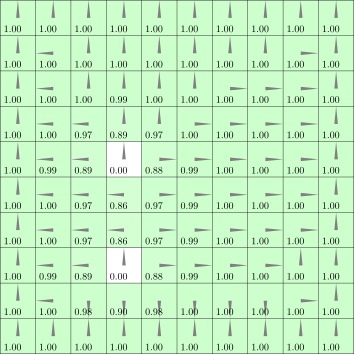

In [11]:
reset_memory!(policy)
V = [value(policy, ProductState(s, policy.memory)) for s in ordered_states(mdp)]
POMDPModels.plot(mdp, V, policy)

In [4]:
property = "G !bad"
# property = "!bad U good"
ltl2tgba(property, "test.hoa")
automata = hoa2buchi("test.hoa")

MDPModelChecking.BuchiAutomata{Int64,String}([1], String["bad"], Dict((1, Set(String["!bad"]))=>1), 1, Set([1]), "G!bad")

In [5]:

pmdp = ProductMDP(mdp, automata)
acc = accepting_states!(pmdp);

In [6]:
solver = ValueIterationSolver(belres=1e-7)
policy = solve(solver, pmdp);

In [7]:
util = policy.util
for s in pmdp.accepting_states
    si = stateindex(pmdp, s)
    util[si] = 1.0
end
reach_prob = zeros(n_states(pmdp.mdp))
for (i, s) in enumerate(ordered_states(pmdp.mdp))
    ps = ProductState(s, pmdp.automata.initialstate)
    psi = stateindex(pmdp, ps)
    reach_prob[i] = util[psi]
end

In [8]:
# for (i, ps) in enumerate(states(pmdp))
#     println("i ", i, " s ", ps.s, " q ", ps.q, " psi ", stateindex(pmdp, ps), " si ", stateindex(pmdp.mdp, ps.s), " qi ", stateindex(pmdp.automata, ps.q))
# end

In [9]:
norm(reach_prob)

9.823688860017802

In [131]:
d = transition(mdp, s, :up)

POMDPToolbox.SparseCat{StaticArrays.MArray{Tuple{5},POMDPModels.GridWorldState,1,5},StaticArrays.MArray{Tuple{5},Float64,1,5}}(POMDPModels.GridWorldState[POMDPModels.GridWorldState(10, 3, false), POMDPModels.GridWorldState(8, 3, false), POMDPModels.GridWorldState(9, 2, false), POMDPModels.GridWorldState(9, 4, false), POMDPModels.GridWorldState(9, 3, true)], [0.0, 0.0, 0.0, 0.0, 1.0])

In [134]:
ProductState(GridWorldState(9, 3, true), 1) ∈ pmdp.accepting_states

false

In [ ]:
GridWorldState(9, 3, true) == GridWorldState()

In [139]:
for s in pmdp.accepting_states
    println(s)
end

MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(1, 2, false), 1)
MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(1, 4, false), 1)
MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(10, 8, false), 1)
MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(1, 6, false), 1)
MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(1, 8, false), 1)
MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(10, 6, false), 1)
MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(10, 2, false), 1)
MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(10, 5, false), 1)
MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(0, 0, true), 1)
MDPModelChecking.ProductS

In [132]:
# s = GridWorldState(9,3, true)
si = stateindex(mdp, s)
reach_prob[si]

1.0

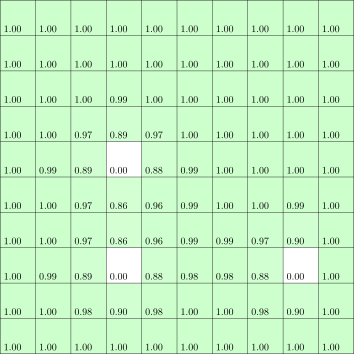

In [109]:
POMDPModels.plot(mdp, reach_prob)

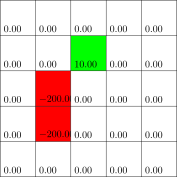

In [60]:
POMDPModels.plot(mdp, s->static_reward(mdp, s))

In [119]:
function label_grid_world(mdp::GridWorld)
    good_states = mdp.reward_states[mdp.reward_values .> 0.]
    bad_states = mdp.reward_states[mdp.reward_values .< 0.]
    labeling = Dict{state_type(mdp), Vector{String}}()
#     for s in good_states
#         labeling[s] = ["good"]
#     end
    for s in bad_states
        labeling[s] = ["bad"]
    end
    labeling[GridWorldState(0, 0, true)] = ["good", "term"]
    return labeling
end
labeling = label_grid_world(mdp)
result = model_checking(mdp, labeling, "Pmax=? [ G ! \"bad\"]", transition_file_name="grid_world.tra", labels_file_name="mdp.lab")
P = get_proba(mdp, result)

101-element Array{Float64,1}:
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 0.996558
 0.977812
 ⋮       
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     

In [65]:
for s in pmdp.accepting_states 
    for a in actions(pmdp)
        d = transition(pmdp, s, a)
        println(d.probs, " ", [(v.s.x, v.s.y, v.q) for v in d.vals])
    end
end

[0.15, 0.15, 0.7] Tuple{Int64,Int64,Int64}[(2, 2, 1), (1, 1, 1), (1, 3, 1)]
[0.15, 0.7, 0.15] Tuple{Int64,Int64,Int64}[(2, 2, 1), (1, 1, 1), (1, 3, 1)]
[1.0] Tuple{Int64,Int64,Int64}[(1, 2, 1)]
[0.7, 0.15, 0.15] Tuple{Int64,Int64,Int64}[(2, 2, 1), (1, 1, 1), (1, 3, 1)]
[1.0] Tuple{Int64,Int64,Int64}[(4, 5, 1)]
[0.15, 0.15, 0.7] Tuple{Int64,Int64,Int64}[(5, 5, 1), (3, 5, 1), (4, 4, 1)]
[0.15, 0.7, 0.15] Tuple{Int64,Int64,Int64}[(5, 5, 1), (3, 5, 1), (4, 4, 1)]
[0.7, 0.15, 0.15] Tuple{Int64,Int64,Int64}[(5, 5, 1), (3, 5, 1), (4, 4, 1)]
[0.15, 0.15, 0.7] Tuple{Int64,Int64,Int64}[(2, 4, 1), (1, 3, 1), (1, 5, 1)]
[0.15, 0.7, 0.15] Tuple{Int64,Int64,Int64}[(2, 4, 1), (1, 3, 1), (1, 5, 1)]
[1.0] Tuple{Int64,Int64,Int64}[(1, 4, 1)]
[0.7, 0.15, 0.15] Tuple{Int64,Int64,Int64}[(2, 4, 1), (1, 3, 1), (1, 5, 1)]
[0.15, 0.15, 0.7] Tuple{Int64,Int64,Int64}[(4, 4, 1), (5, 3, 1), (5, 5, 1)]
[0.15, 0.7, 0.15] Tuple{Int64,Int64,Int64}[(4, 4, 1), (5, 3, 1), (5, 5, 1)]
[0.7, 0.15, 0.15] Tuple{Int64,Int64,In

In [43]:
for s in states(pmdp)
    for a in actions(pmdp, s)
        d = transition(pmdp, s, a)
        tsum = 0. 
        for (sp, p) in weighted_iterator(d)
            tsum += p
        end
        println("For s ", s, " a ", a, " sums to ", tsum)
        println(" next states ", d.vals)
        if !(tsum ≈ 1.0)
            println("error for s ", s, " a ", a, " sums to ", tsum, " next states ", d.vals)
        end
    end
end

For s MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(1, 1, false), 1) a up sums to 1.0
 next states MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}[MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(2, 1, false), 1), MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(1, 2, false), 1)]
For s MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(1, 1, false), 1) a down sums to 1.0
 next states MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}[MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(1, 1, false), 1)]
For s MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(1, 1, false), 1) a left sums to 1.0
 next states MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}[MDPModelChecking.ProductState{POMDPModels.Gri

For s MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(4, 1, false), 2) a down sums to 1.0
 next states MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}[MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(4, 1, false), 2)]
For s MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(4, 1, false), 2) a left sums to 1.0
 next states MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}[MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(5, 1, false), 2), MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(3, 1, false), 2), MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(4, 2, false), 2)]
For s MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(4, 1, false), 2) a right sums to 1.0
 next stat

For s MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(2, 2, false), 1) a right sums to 1.0000000000000002
 next states MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}[MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(3, 2, false), 1), MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(1, 2, false), 1), MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(2, 1, false), 1), MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(2, 3, false), 1)]
For s MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(2, 2, false), 2) a up sums to 1.0
 next states MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}[MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(3, 2, false), 2), MDPModelChecking.Prod

 next states MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}[MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(5, 2, false), 1), MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(3, 2, false), 1), MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(4, 1, false), 1), MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(4, 3, false), 1)]
For s MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(4, 2, false), 2) a up sums to 1.0
 next states MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}[MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(5, 2, false), 2), MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(3, 2, false), 2), MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int6

 next states MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}[MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(3, 3, false), 1), MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(1, 3, false), 1), MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(2, 2, false), 1), MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(2, 4, false), 1)]
For s MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(2, 3, false), 1) a right sums to 1.0000000000000002
 next states MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}[MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(3, 3, false), 1), MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(1, 3, false), 1), MDPModelChecking.ProductState{POMDPModels.G

For s MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(4, 3, false), 2) a up sums to 1.0
 next states MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}[MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(4, 3, true), 1)]
For s MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(4, 3, false), 2) a down sums to 1.0
 next states MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}[MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(4, 3, true), 1)]
For s MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(4, 3, false), 2) a left sums to 1.0
 next states MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}[MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(4, 3, true), 1)]
For s MDPModelChecking.ProductState{POMDPModels.

 next states MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}[MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(3, 4, false), 1), MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(1, 4, false), 1), MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(2, 3, false), 1), MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(2, 5, false), 1)]
For s MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(2, 4, false), 1) a left sums to 1.0000000000000002
 next states MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}[MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(3, 4, false), 1), MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(1, 4, false), 1), MDPModelChecking.ProductState{POMDPModels.Gr

 next states MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}[MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(5, 4, false), 1), MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(3, 4, false), 1), MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(4, 3, false), 1), MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(4, 5, false), 1)]
For s MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(4, 4, false), 1) a down sums to 1.0
 next states MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}[MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(5, 4, false), 1), MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(3, 4, false), 1), MDPModelChecking.ProductState{POMDPModels.GridWorldState,In

 next states MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}[MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(1, 5, false), 2)]
For s MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(1, 5, false), 2) a down sums to 1.0
 next states MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}[MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(2, 5, false), 2), MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(1, 4, false), 2)]
For s MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(1, 5, false), 2) a left sums to 1.0
 next states MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}[MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(1, 5, false), 2)]
For s MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int6

 next states MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}[MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(5, 5, false), 1), MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(3, 5, false), 1), MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(4, 4, false), 1)]
For s MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(4, 5, false), 2) a up sums to 1.0
 next states MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}[MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(4, 5, false), 2)]
For s MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDPModels.GridWorldState(4, 5, false), 2) a down sums to 1.0
 next states MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}[MDPModelChecking.ProductState{POMDPModels.GridWorldState,Int64}(POMDP

In [3]:
using LightGraphs, GraphPlot

INFO: Recompiling stale cache file /mnt/c/Users/Maxime/wsl/.julia/lib/v0.6/GraphPlot.ji for module GraphPlot.


Input: A sub-MDP (C; D).
Output: L = maxEC (C; D).
Initialization: L := f(C; D)g. Repeat the following steps:
 Select (E; F ) 2 L.  For all s 2 E, let F 0(s) := fa 2 F (s) j Succ(s; a)  Eg.  Let E1;:::;En be the strongly connected components of the graph (E; (E;F 0)), and let
Fi(s) = F 0(s) for all i 2 [1::n] and s 2 Ei .  Replace (E; F ) 2 L with (E1; F1);:::; (En; Fn).
Until: L cannot be changed by the above iteration.

In [4]:
# discrete MDP 1 
ns = 4
na = 6
R = zeros(ns, na)
T = zeros(ns, na, ns) # sp, a, s


# from state 1
T[2,1, 1] = 1.0  # if go, move to 2
T[1,2:na,1] = 1.0 # else stay

# from state 2
T[1,2,2] = 0.7 # if (s2, safe) end up in 1
T[3,2,2] = 0.3 # if (s2, safe) end up in 3

T[3,3,2] = 0.5
T[4,3,2] = 0.5
T[2,1,2] = 1.
T[2,4:end,2] = 1.

# from state 3
T[3,:,3] = 1

# from state 4 
T[4,:,4] = 1.
T[:,4,4] = 0.
T[1,4,4] = 1.

mdp = DiscreteMDP(T, R, 0.95)
# actions: [go, safe, risk, reset, finish, stop]
function POMDPs.actions(mdp::DiscreteMDP, s::Int64)
    if s == 1
        return [1]
    elseif s == 2
        return [2, 3]
    elseif s == 3
        return [5]
    elseif s == 4
        return [4, 6]
    end
end        

In [5]:
d = transition(mdp, 1, 1)
pdf(d, 2)

1.0

In [6]:
function maximal_end_components(mdp::MDP{S, A}) where {S, A}
    mdpg = mdp_to_graph(mdp)
    state_space = states(mdp)
    MEC = Vector{Vector{Int64}}() 
    MECnew = Vector{Vector{Int64}}()
    push!(MECnew, 1:n_states(mdp))# initialize
    DEBUG_STEP = 1 #XXX
    DEBUG_MAX_STEPS = 100 # XXX

    while MEC != MECnew && DEBUG_STEP < DEBUG_MAX_STEPS
        MEC = deepcopy(MECnew)
        MECnew = Vector{Vector{Int64}}()
        for sub_state_space in MEC
            # build subgraph that corresponds to sub_state_space, subgraph of mdpgraph, where all actions moving outside of ss are removed 
            sub_g = sub_mdp(mdp, sub_state_space, state_space)
            scc = strongly_connected_components(sub_g)
            for component in scc                  
                # map bag to state indices
                stateindex_component = sub_state_space[component]
                # check that component is not trivial (is at least a cycle)
                if length(component) == 1 && !has_edge(sub_g, component[1], component[1])
                    continue # skip trivial components
                end
                push!(MECnew, stateindex_component)
            end
        end
        println("finished $DEBUG_STEP step, old MEC $MEC -> new MEC $MECnew")
        DEBUG_STEP += 1
    end
    return MEC
end

# convert MDP to graph 
function mdp_to_graph(mdp::M) where {M <: MDP}
    g = DiGraph(n_states(mdp))
    for (i, s) in enumerate(ordered_states(mdp))
        si = stateindex(mdp, s)
        if isterminal(mdp, s)
            add_edge!(g, si, si)
        end
        for a in actions(mdp, s)
            d = transition(mdp, s, a)
            for (sp, p) in weighted_iterator(d)
                spi = stateindex(mdp, sp)
                if !(p ≈ 0.)
                   add_edge!(g, si, spi)
                end
            end
        end
    end
    return g 
end

# return a graph of the subMDP defined by ss
function sub_mdp(mdp::MDP{S, A}, state_indices::Vector{Int64}, state_space::AbstractArray{S}) where {S, A}
    g = DiGraph(length(state_indices))
    for (i, si) in enumerate(state_indices)
        s = state_space[si]
        if isterminal(mdp, s)
            add_edge!(g, i, i)
            
        end
        for a in actions(mdp, s)
            d = transition(mdp, s, a)
            is_action_valid = true
            for (sp, p) in weighted_iterator(d)
                spi = stateindex(mdp, sp)
                if !in(spi, state_indices) && !(p ≈ 0.)
                    is_action_valid = false
                end
            end
            if is_action_valid
                for (sp, p) in weighted_iterator(d)
                    if !(p≈0.)
                        spi = stateindex(mdp, sp)
                        j = findfirst(x->x==spi, state_indices)
                        add_edge!(g, i, j)
                    end
                end
            end
        end
    end
    return g
end

sub_mdp (generic function with 1 method)

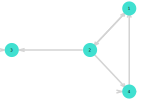

In [7]:
g = mdp_to_graph(mdp)
gplot(g, nodelabel=1:n_states(mdp), layout=spectral_layout)

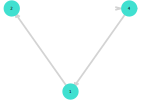

In [8]:
subg = sub_mdp(mdp, [1,2,4], states(mdp))
gplot(subg, nodelabel=[1,2,4], layout=spectral_layout)

In [9]:
scc = strongly_connected_components(subg)

3-element Array{Array{Int64,1},1}:
 [2]
 [1]
 [3]

In [10]:
MEC = maximal_end_components(mdp)

finished 1 step, old MEC Array{Int64,1}[[1, 2, 3, 4]] -> new MEC Array{Int64,1}[[3], [1, 2, 4]]
finished 2 step, old MEC Array{Int64,1}[[3], [1, 2, 4]] -> new MEC Array{Int64,1}[[3], [4]]
finished 3 step, old MEC Array{Int64,1}[[3], [4]] -> new MEC Array{Int64,1}[[3], [4]]


2-element Array{Array{Int64,1},1}:
 [3]
 [4]

In [11]:
MEC

2-element Array{Array{Int64,1},1}:
 [3]
 [4]

In [12]:
mdpg = mdp_to_graph(mdp)
state_space = states(mdp)
MEC = Vector{Vector{Int64}}() 
MECnew = Vector{Vector{Int64}}()
push!(MECnew, 1:n_states(mdp))# initialize
debug_step = 1.

1.0

In [13]:
while MEC != MECnew && debug_step < 100
    MEC = deepcopy(MECnew)
    MECnew = Vector{Vector{Int64}}()
    for sub_state_space in MEC
        # build subgraph that corresponds to ss, subgraph of mdpgraph, where all actions moving outside of ss are removed 
        sub_g = sub_mdp(mdp, sub_state_space, state_space)
        scc = strongly_connected_components(sub_g)
        for component in scc
            # map bag to state indices
            stateindex_component = sub_state_space[component]
            push!(MECnew, stateindex_component)
        end
    end
    println("finished $debug_step step, old MEC $MEC -> new MEC $MECnew")
    debug_step += 1
end

finished 1.0 step, old MEC Array{Int64,1}[[1, 2, 3, 4]] -> new MEC Array{Int64,1}[[3], [1, 2, 4]]
finished 2.0 step, old MEC Array{Int64,1}[[3], [1, 2, 4]] -> new MEC Array{Int64,1}[[3], [2], [1], [4]]
finished 3.0 step, old MEC Array{Int64,1}[[3], [2], [1], [4]] -> new MEC Array{Int64,1}[[3], [2], [1], [4]]


In [14]:
sub_g = sub_mdp(mdp, [3], state_space)
scc = strongly_connected_components(sub_g)

1-element Array{Array{Int64,1},1}:
 [1]

In [15]:
# return a graph of the subMDP defined by ss
function sub_mdp(mdp::MDP{S, A}, state_indices::Vector{Int64}, state_space::AbstractArray{S}) where {S, A}
    g = DiGraph(length(state_indices))
    for (i, si) in enumerate(state_indices)
        s = state_space[si]
        if isterminal(mdp, s)
            add_edge!(g, i, i)
        end
        for a in actions(mdp)
            d = transition(mdp, s, a)
            is_action_valid = true
            for (sp, p) in weighted_iterator(d)
                spi = stateindex(mdp, sp)
                println(spi ∈ state_indices)
                if !in(spi, state_indices)
                    is_action_valid = false
                end
            end
            if is_action_valid
                for (sp, p) in weighted_iterator(d)
                    if !(p≈0.)
                        spi = stateindex(mdp, sp)
                        add_edge!(g, spi, si)
                    end
                end
            end
        end
    end
    return g
end

sub_mdp (generic function with 1 method)

In [16]:
for e in edges(g)
    println(e)
end

Edge 1 => 2
Edge 2 => 1
Edge 2 => 3
Edge 2 => 4
Edge 3 => 3
Edge 4 => 1
Edge 4 => 4


In [17]:
for (sp, p) in weighted_iterator(transition(mdp, 3, 1))
    println("state ", sp, " prob ", p)
end

state 1 prob 0.0
state 2 prob 0.0
state 3 prob 1.0
state 4 prob 0.0


In [18]:
scc = strongly_connected_components(g)

2-element Array{Array{Int64,1},1}:
 [3]      
 [1, 2, 4]

In [19]:
methods(strongly_connected_components)

# 2 methods for generic function "strongly_connected_components":
strongly_connected_components(g::AG) where {T, AG<:LightGraphs.AbstractGraph{T}} in LightGraphs at /mnt/c/Users/Maxime/wsl/.julia/v0.6/SimpleTraits/src/SimpleTraits.jl:307
strongly_connected_components(::Type{LightGraphs.IsDirected{AG}}, g::AG) where {T, AG<:LightGraphs.AbstractGraph{T}} in LightGraphs at /mnt/c/Users/Maxime/wsl/.julia/v0.6/SimpleTraits/src/SimpleTraits.jl:299

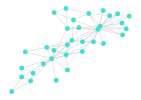

In [20]:
g = graphfamous("karate")
gplot(g)

In [21]:
iterator(states(mdp))

1:4

In [22]:
n = 3
g = DiGraph(n)

{3, 0} directed simple Int64 graph

In [23]:
add_edge!(g, 1, 2)
add_edge!(g, 2, 3)
add_edge!(g, 1, 2)

false

In [24]:
g

{3, 2} directed simple Int64 graph